Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. 

In [22]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.tail(80)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1380,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1381,1382,20,RL,NaN,12925,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,237500
1382,1383,70,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,157000
1383,1384,30,RL,NaN,25339,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,112000
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Verileri inceleyin ve gerekli tüm verileri temizleyin.

In [7]:
house_prices_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
null_columns=house_prices_df.columns[house_prices_df.isnull().any()] #column names with null values
print(house_prices_df[null_columns].isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [11]:
to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature']

for k in to_drop:
    house_prices_df.drop([k], axis = 1, inplace = True)

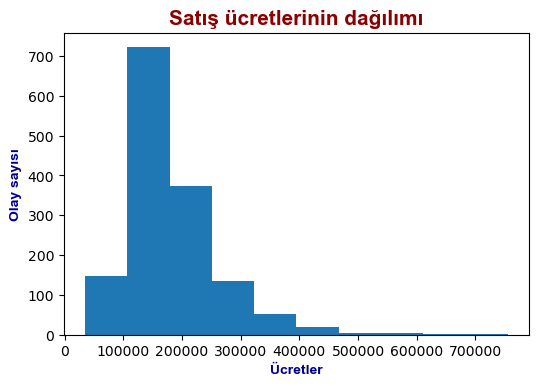

In [13]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(house_prices_df.SalePrice)
plt.title("Satış fiyatlarının dağılımı", fontdict = baslik_font)
plt.xlabel("Ücretler", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.

In [23]:
house_prices_df["CentralAir"] = pd.get_dummies(house_prices_df.CentralAir, drop_first=True)
house_prices_df["Street"] = house_prices_df.Street.replace({'Pave':1, "Grvl":0})
house_prices_df[['CentralAir','Street']].head()

,CentralAir,Street
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


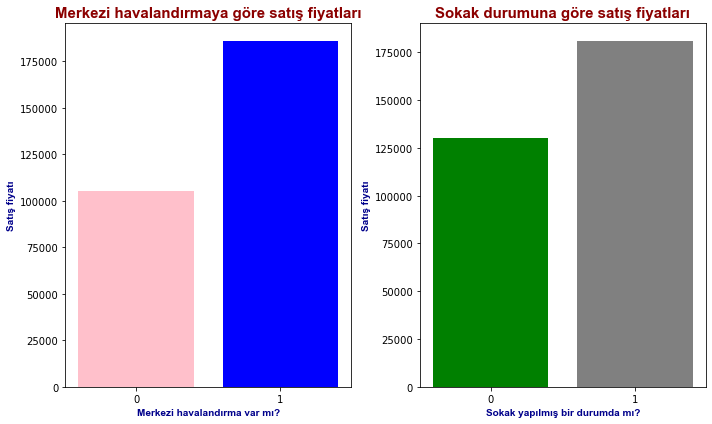

In [25]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(house_prices_df.groupby("CentralAir")["SalePrice"].mean().index, 
        house_prices_df.groupby("CentralAir")["SalePrice"].mean(),
        color=("pink","blue"))
plt.title("Merkezi havalandırmaya göre satış fiyatları", fontdict = baslik_font)
plt.ylabel("Satış fiyatı", fontdict = eksen_font)
plt.xlabel("Merkezi havalandırma var mı?", fontdict = eksen_font)
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(house_prices_df.groupby("Street")["SalePrice"].mean().index, 
        house_prices_df.groupby("Street")["SalePrice"].mean(),
        color=("green","grey"))
plt.title("Sokak durumuna göre satış fiyatları", fontdict = baslik_font)
plt.ylabel("Satış fiyatı", fontdict = eksen_font)
plt.xlabel("Sokak yapılmış bir durumda mı?", fontdict = eksen_font)
plt.xticks([0,1])

plt.tight_layout()
plt.show()

Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

Merkezi havalandırmaya sahip evler ve sokağı yapılmış(çakıl kaplı olmayan) evler daha yüksek fiyatlı satılmaktadır.

SalePrice=β0+β1CentralAir+β2Street+ϵ

Hedef değişkeni olarak Y, ihtiyaç duyduğumuz ve formülüze edeceğimiz değerler için ise X değişkenini kullanıyoruz.

In [27]:
Y = house_prices_df['SalePrice']
X = house_prices_df[['CentralAir','Street']]

In [28]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     49.58
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.48e-21
Time:                        01:04:45   Log-Likelihood:                -18496.
No. Observations:                1460   AIC:                         3.700e+04
Df Residuals:                    1457   BIC:                         3.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.66e+04   3.19e+04      2.403      0.016    1.41e+04    1.39e+05
CentralAir  8.039e+04   8182.098      9.825      0.000    6.43e+04    9.64e+04
Street      2.928e+04   3.15e+04      0.928      0.353   -3.26e+04    9.12e+04
==============================================================================
Omnibus:                      650.899   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4067.146
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      10.145   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""